In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

### Load in the simulation results

In [4]:
n_sim = 1000
results_loc = os.path.abspath((os.path.join(os.getcwd(), '..', '..', 'Results', 'bootstrap')))
with open(results_loc + f'/logistic_regression_accuracy_{n_sim}.pkl', 'rb') as f:
    logreg_acc_list = np.array(pickle.load(f))
with open(results_loc + f'/logistic_regression_f1_{n_sim}.pkl', 'rb') as f:
    logreg_f1_list = np.array(pickle.load(f))
with open(results_loc + f'/logistic_regression_f1_w_{n_sim}.pkl', 'rb') as f:
    logreg_f1_w_list = np.array(pickle.load(f))
with open(results_loc + f'/neural_network_accuracy_{n_sim}.pkl', 'rb') as f:
    nn_acc_list = np.array(pickle.load(f))
with open(results_loc + f'/neural_network_f1_{n_sim}.pkl', 'rb') as f:
    nn_f1_list = np.array(pickle.load(f))
with open(results_loc + f'/neural_network_f1_w_{n_sim}.pkl', 'rb') as f:
    nn_f1_w_list = np.array(pickle.load(f))

### Initial Quantitative Results:

In [5]:
print(f'The mean accuracy of the logistic regression: {logreg_acc_list.mean()}.')
print(f'The mean f1-score of the logistic regression: {logreg_f1_list.mean()}.')
print(f'The mean weighted f1-score of the logistic regression: {logreg_f1_w_list.mean()}.')
print(f'The mean accuracy of the neural network: {nn_acc_list.mean()}.')
print(f'The mean f1-score of the neural network: {nn_f1_list.mean()}.')
print(f'The mean weighted f1-score of the neural network: {nn_f1_w_list.mean()}.')

The mean accuracy of the logistic regression: 0.8985844444444444.
The mean f1-score of the logistic regression: 0.5785474895208867.
The mean weighted f1-score of the logistic regression: 0.8851689654003962.
The mean accuracy of the neural network: 0.9532577777777778.
The mean f1-score of the neural network: 0.8448177125252242.
The mean weighted f1-score of the neural network: 0.9524284695432496.


In [6]:
print(f'The standard error of the accuracy for the logistic regression: {logreg_acc_list.std()/np.sqrt(len(logreg_acc_list))}.')
print(f'The standard error of the f1-score for the logistic regression: {logreg_f1_list.std()/np.sqrt(len(logreg_f1_list))}.')
print(f'The standard error of the weighted f1-score for the logistic regression: {logreg_f1_w_list.std()/np.sqrt(len(logreg_f1_w_list))}.')
print(f'The standard error of the accuracy for the neural network: {nn_acc_list.std()/np.sqrt(len(nn_acc_list))}.')
print(f'The standard error of the f1-score for the neural network: {nn_f1_list.std()/np.sqrt(len(nn_f1_list))}')
print(f'The standard error of the weighted f1-score for the neural network: {nn_f1_w_list.std()/np.sqrt(len(nn_f1_w_list))}')

The standard error of the accuracy for the logistic regression: 0.0003312395798500826.
The standard error of the f1-score for the logistic regression: 0.001452448430589935.
The standard error of the weighted f1-score for the logistic regression: 0.0003959873837922329.
The standard error of the accuracy for the neural network: 0.00031409555831480077.
The standard error of the f1-score for the neural network: 0.0011762417785319912
The standard error of the weighted f1-score for the neural network: 0.00034113389320018734


### Qualitative Results

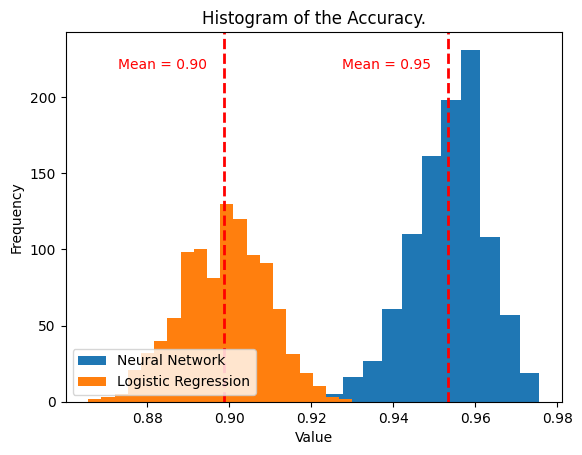

In [6]:
#Histogram containing the accuracy of the logistic regression and Neural Network
mean_value_logreg = logreg_acc_list.mean()
mean_value_nn = nn_acc_list.mean()

#Create histograms:
plt.hist(nn_acc_list, bins=20, label='Neural Network')
plt.hist(logreg_acc_list, bins = 20, label='Logistic Regression')
plt.title('Histogram of the Accuracy.')
plt.xlabel('Value')
plt.ylabel('Frequency')

#Add the mean lines:
plt.legend(loc = 'lower left')
plt.axvline(mean_value_nn, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.text(mean_value_nn-0.015, plt.ylim()[1] * 0.9, f'Mean = {mean_value_nn:.2f}', color='red', ha='center')
plt.axvline(mean_value_logreg, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.text(mean_value_logreg-0.015, plt.ylim()[1] * 0.9, f'Mean = {mean_value_logreg:.2f}', color='red', ha='center')
plt.show()

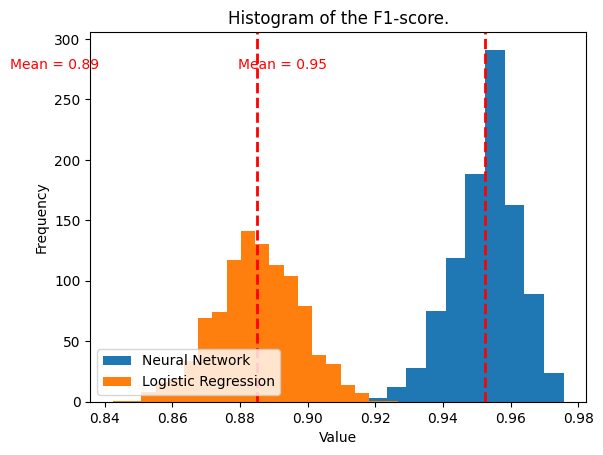

In [7]:
#Histogram containing the f1-score of the logistic regression and Neural Network
mean_value_logreg = logreg_f1_list.mean()
mean_value_nn = nn_f1_list.mean()

#Create histograms:
plt.hist(nn_f1_list, bins=20, label='Neural Network')
plt.hist(logreg_f1_list, bins = 20, label='Logistic Regression')
plt.title('Histogram of the F1-score.')
plt.xlabel('Value')
plt.ylabel('Frequency')

#Add the mean lines:
plt.legend(loc = 'lower left')
plt.axvline(mean_value_nn, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.text(mean_value_nn-0.06, plt.ylim()[1] * 0.9, f'Mean = {mean_value_nn:.2f}', color='red', ha='center')
plt.axvline(mean_value_logreg, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.text(mean_value_logreg-0.06, plt.ylim()[1] * 0.9, f'Mean = {mean_value_logreg:.2f}', color='red', ha='center')
plt.show()

### Number of Simulations Justification:

In [6]:
def n_sim_mean(d: float, performance_list: np.ndarray):
    """This function computes the desired number of simulations for the mean performance measures based on a 
    prespecified Monte Carlo Standard Error d for the mean.

    ARGS:
        d: The desired Monte Carlo Standard Error.
        performance_list: a numpy array containing the simulation results.

    OUTPUT:
        The minimum number of simulations required to satisfy the prespecified MCSE.
    """ 
    numerator = (performance_list.std())**2
    denominator = d**2
    return (numerator/denominator)

In [7]:
def n_sim_se(d: float, performance_list: np.ndarray):
    """This function computes the desired number of simulations based on a prespecified Monte Carlo Standard Error 
    d for the emperical standard error of the simulation results.

    ARGS:
        d: The desired Monte Carlo Standard Error.
        performance_list: a numpy array containing the simulation results.

    OUTPUT:
        The minimum number of simulations required to satisfy the prespecified MCSE.
    """
    empse = performance_list.std()/np.sqrt(len(performance_list))
    n_sim = ((empse**2)/(d**2) + 2)/2
    return n_sim

In [11]:
d = 0.00001
print(n_sim_se(d, nn_f1_list))

582.861665449584
